In [1]:
import model_utils as mu
mu.DEATH_RATE = 0.36
mu.ICU_RATE = 0.78
mu.HOSPITAL_RATE = 2.18
mu.SYMPTOM_RATE = 10.2
mu.INFECT_2_HOSPITAL_TIME = 11
mu.HOSPITAL_2_ICU_TIME = 4
mu.ICU_2_DEATH_TIME = 4
mu.ICU_2_RECOVER_TIME = 7
mu.NOT_ICU_DISCHARGE_TIME = 5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
daily_metrics, cum_metrics, model_beta = mu.get_metrics_by_country('Iraq', lockdown_date='20200322', relax_date='20200411')

NumExpr defaulting to 4 threads.
C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:263: RuntimeWarning: divide by zero encountered in log
  log_daily_death = np.log(daily_local_death_new)


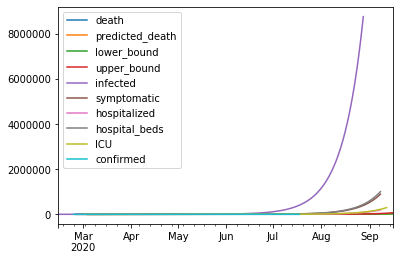

In [4]:
daily_metrics.plot()

In [5]:
import plotly.offline as py_offline
import cufflinks as cf
cf.go_offline()
py_offline.__PLOTLY_OFFLINE_INITIALIZED = True

In [6]:
daily_metrics.iplot()

In [7]:
import SEIR

In [38]:
Infected = (100/mu.DEATH_RATE)*daily_metrics.death

In [39]:
 relax_date='20200511'

In [54]:
Cases = Infected.cumsum()
Cases = Cases[Cases.index>=relax_date].dropna()


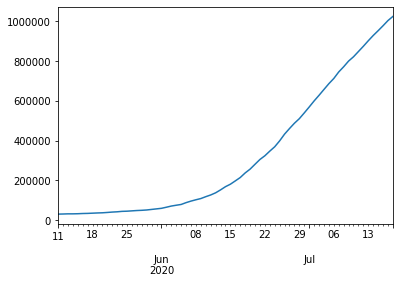

In [55]:
Cases.dropna().plot()

In [56]:
Cases.iloc[0]

29999.999999999978

In [57]:
import pandas as pd
pd.to_datetime('')

NaT

In [58]:
start_date ='20200420'

In [59]:
C = np.array(Cases.iloc[:])
N = 38430000 # the population of Iraq
SEIR.N = 38430000 # the population of Iraq
r0 = cum_metrics.infected[start_date]
i0=C[0]-r0
I0 = [i0] 
E0 = i0 * range(6)

In [44]:
i0

3741.7229976941235

In [45]:
C[0]

29999.999999999978

In [46]:
len(C)

129

In [54]:
best = np.inf
res = (0, 0, 0)
t = np.arange(len(Ipast))

for e0 in E0:
    for i0 in I0:    
        y0 = [N-e0-i0, e0, i0, r0]
        opt, val = SEIR.minimization(y0, t, Ipast, 10)
        if (val < best):
            besty0 = y0
            res = opt
            best = val
        print((e0, i0, best))

tau = np.arange(len(I))
fitted = SEIR.dynamics(besty0, tau, *res)[:,2]


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



(0.0, 555.5555555555555, 76073219.06532794)
(555.5555555555555, 555.5555555555555, 72988039.67502809)
(1111.111111111111, 555.5555555555555, 72988039.67502809)
(1666.6666666666665, 555.5555555555555, 72988039.67502809)
(2222.222222222222, 555.5555555555555, 72988039.67502809)
(2777.777777777778, 555.5555555555555, 72988039.67502809)


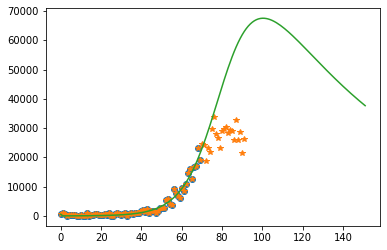

In [55]:
plt.plot(t, Ipast, 'o')
plt.plot(tau, I, '*')
plt.plot(tau, fitted)
plt.show()

Not working when data is not over peaked

In [56]:
Ipast = I[0:80]

best = np.inf
res = (0, 0, 0)
t = np.arange(len(Ipast))

for e0 in E0:
    for i0 in I0:    
        y0 = [N-e0-i0, e0, i0, 0]
        opt, val = SEIR.minimization(y0, t, Ipast, 10)
        if (val < best):
            besty0 = y0
            res = opt
            best = val
        print((e0, i0, best))

tau = np.arange(len(I))
fitted = SEIR.dynamics(besty0, tau, *res)[:,2]


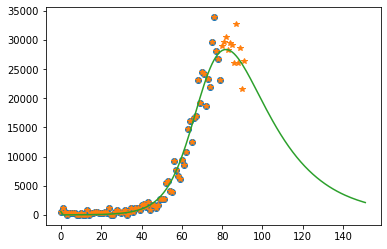

In [58]:
plt.plot(t, Ipast, 'o')
plt.plot(tau, I, '*')
plt.plot(tau, fitted)
plt.show()

Only work if we have data near peak

In [48]:
cum_metrics.iplot()

In [49]:
len(C)

129

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.



(0.0, 3741.7229976941235, 356951.4586316991)
(3741.7229976941235, 3741.7229976941235, 356045.6751962023)
(7483.445995388247, 3741.7229976941235, 356045.6751962023)
(11225.16899308237, 3741.7229976941235, 356045.6751962023)
(14966.891990776494, 3741.7229976941235, 356045.6751962023)
(18708.614988470617, 3741.7229976941235, 356045.6751962023)


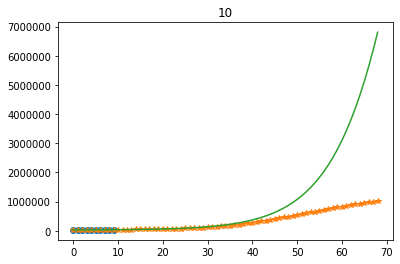

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



(0.0, 3741.7229976941235, 2936776.6635991773)
(3741.7229976941235, 3741.7229976941235, 2936625.524111681)
(7483.445995388247, 3741.7229976941235, 2936625.524111681)
(11225.16899308237, 3741.7229976941235, 2936625.524111681)
(14966.891990776494, 3741.7229976941235, 2936625.524111681)


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.



Error - curve_fit failed
(18708.614988470617, 3741.7229976941235, 2936625.524111681)


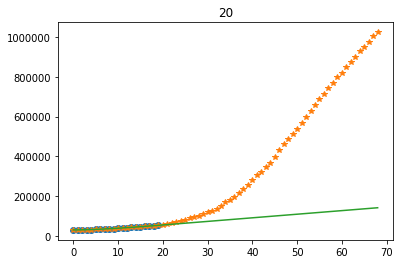

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.



(0.0, 3741.7229976941235, 50197375.970831394)
(3741.7229976941235, 3741.7229976941235, 46401062.66967151)


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



(7483.445995388247, 3741.7229976941235, 46401062.66967151)


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



(11225.16899308237, 3741.7229976941235, 46401062.66967151)
(14966.891990776494, 3741.7229976941235, 46401062.66967151)
(18708.614988470617, 3741.7229976941235, 46401062.66967151)


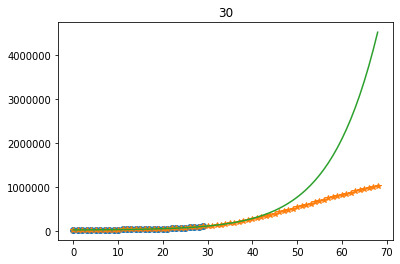

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



(0.0, 3741.7229976941235, 73306675.50564474)


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:20: RuntimeWarning:

overflow encountered in exp

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



(3741.7229976941235, 3741.7229976941235, 73306675.50564474)
(7483.445995388247, 3741.7229976941235, 72695943.61964734)
(11225.16899308237, 3741.7229976941235, 72549087.82879311)
(14966.891990776494, 3741.7229976941235, 72362397.13275313)
(18708.614988470617, 3741.7229976941235, 72162814.58976139)


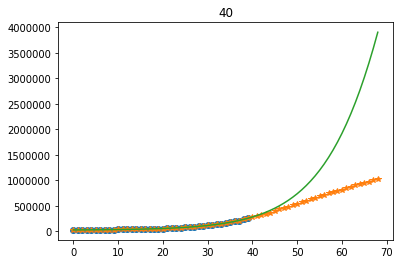

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.



(0.0, 3741.7229976941235, 3686462421.924508)


C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:20: RuntimeWarning:

overflow encountered in exp

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



(3741.7229976941235, 3741.7229976941235, 367911125.7458796)
(7483.445995388247, 3741.7229976941235, 367911125.7458796)
(11225.16899308237, 3741.7229976941235, 367911125.7458796)
(14966.891990776494, 3741.7229976941235, 367911125.7458796)
(18708.614988470617, 3741.7229976941235, 367911125.7458796)


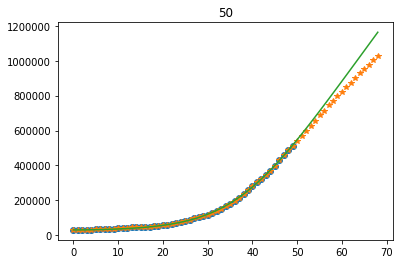

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



(0.0, 3741.7229976941235, 36332959950.602745)
(3741.7229976941235, 3741.7229976941235, 36332959950.602745)
(7483.445995388247, 3741.7229976941235, 36332959950.602745)
(11225.16899308237, 3741.7229976941235, 36332959950.602745)
(14966.891990776494, 3741.7229976941235, 36332959950.602745)
(18708.614988470617, 3741.7229976941235, 36332959950.602745)


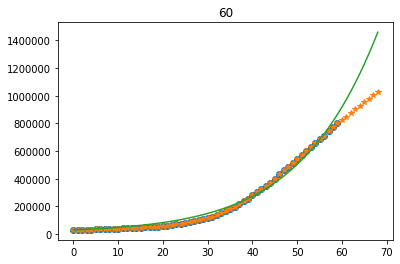

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



(0.0, 3741.7229976941235, 124372190470.13388)
(3741.7229976941235, 3741.7229976941235, 10280309108.775358)
(7483.445995388247, 3741.7229976941235, 10280309108.775358)
(11225.16899308237, 3741.7229976941235, 1838617807.2667444)
(14966.891990776494, 3741.7229976941235, 1838617807.2667444)
(18708.614988470617, 3741.7229976941235, 1838617807.2667444)


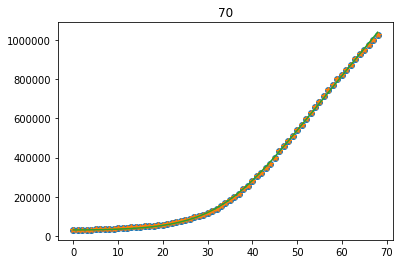

In [62]:

for n_data_point in [10,20,30,40,50,60, 70]:
    Cpast = C[0:n_data_point]

    best = np.inf
    res = (0, 0, 0)
    t = np.arange(len(Cpast))

    for e0 in E0:
        for i0 in I0:    
            y0 = [N-e0-i0-r0, e0, i0, r0]
            opt, val = SEIR.minimization(y0, t, Cpast, 10)
            if (val < best):
                besty0 = y0
                res = opt
                best = val
            print((e0, i0, best))

    tau = np.arange(len(C))
    out_seir = SEIR.dynamics(besty0, tau, *res)
    fitted = out_seir[:,2]+out_seir[:,3]
    plt.plot(t, Cpast, 'o')
    plt.plot(tau, C, '*')
    plt.plot(tau, fitted)
    plt.title('{}'.format(n_data_point))
    plt.show()

In [52]:
C

array([  30000.        ,   30555.55555556,   31388.88888889,
         31388.88888889,   31944.44444444,   33055.55555556,
         33611.11111111,   34722.22222222,   35833.33333333,
         36666.66666667,   38333.33333333,   40277.77777778,
         41666.66666667,   43888.88888889,   44722.22222222,
         46388.88888889,   48055.55555556,   49166.66666667,
         50833.33333333,   53611.11111111,   56388.88888889,
         59166.66666667,   64722.22222222,   70555.55555556,
         74722.22222222,   78611.11111111,   87777.77777778,
         95555.55555556,  102222.22222222,  108333.33333333,
        117777.77777778,  126388.88888889,  137222.22222222,
        151944.44444444,  168055.55555556,  180555.55555556,
        197222.22222222,  214166.66666667,  237222.22222222,
        256388.88888889,  280833.33333333,  305000.        ,
        323611.11111111,  346944.44444444,  368888.88888889,
        398611.11111111,  432500.        ,  460555.55555556,
        487222.22222222,

In [21]:
fitted

array([277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77777778,
       277.77777778, 277.77777778, 277.77777778, 277.77